
# **Use Case: Counting People in Images**

**Description:** In this lab we will use an Computer Vision AI service to detect, how many people are present in a given image. This information can then be used in downstream processing for several use cases.

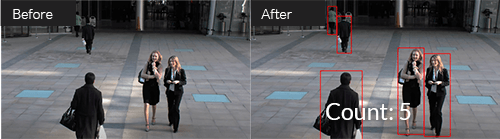

The solution architecture for this use case covers the following essential steps:

1. Uploading an image
2. Preprocessing the image
3. Calling Computer Vision AI Service
4. Filtering and aggregating AI results
5. Displaying the object count and marking the recognized objects. 

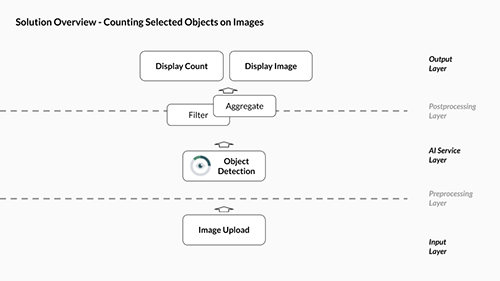

## **0. Setup**

Install dependencies and load the utilities functions.

In [ ]:
! git clone https://github.com/rapyd-ai/use-cases.git &> /dev/null
%cd /content/use-cases/utils

from ai_service_layer import *
from input_layer import *
from output_layer import *
from postprocessing_layer import *
from preprocessing_layer import *

/content/use-cases/utils


## **1. Data**

First, specify your input data, in this case an image file. 

Paste URL **or** upload files from your local filesystem.

In [ ]:
#@markdown Option A: Enter the URL of the image: 
URL = 'https://drive.google.com/uc?export=view&id=1A3jBzg_tTqpEyZRS_g9Dy1RT4vyerHcD' #@param {type:"string"}

r = file_upload_url(URL)


In [ ]:
#@markdown Option B: Upload file 

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving people_cctv.jpg to people_cctv.jpg
User uploaded file "people_cctv.jpg" with length 393531 bytes


## **2. Preprocessing**
Preparing data for the API.

In [ ]:
try: 
  FILE_NAME = list(uploaded)[0]
except:
  FILE_NAME = 'input.jpg'

image = cv2_read_image(FILE_NAME)
image = cv2_resize_image(image)
img_width, img_height = image.shape[1], image.shape[0]
print("File '" + FILE_NAME + "' with " + str(img_width) + " x " + str(img_height) + "px ready for processing through AI service.")

File 'input.jpg' with 1600 x 827px ready for processing through AI service.


## **3. AI Service**

Calling the actual AI Service.

In [ ]:
#@markdown Enter your RAPYD.AI Account ID and Token (You can find both in your [dashboard](https://www.rapyd.ai/app/start). If you don't use RAPYD.AI yet, [sign up here](https://www.rapyd.ai/app/sign-up) free of charge.)
ACCOUNTID = 'your-accountid' #@param {type:"string"}
TOKEN = 'your-token' #@param {type:"string"}
PROVIDER = 'aws' #@param ["aws", "gcp", "azure", "auto"]
response_json = rapydai_vision(FILE_NAME, 'localize', PROVIDER, ACCOUNTID, TOKEN)
print(response_json)

<Response [201]>


## **4. Postprocessing**
In this step, we will filter the results to the desired labels and confidence level


In [ ]:
#@markdown Please choose the minimum confidence level for the detection:
CONFIDENCE_LEVEL = 0.9 #@param {type:"slider", min:0, max:1, step:0.02}
DESCRIPTION = 'Person'
result = localize_filter_label(response_json, DESCRIPTION)
conf_json = localize_filter_confidence(result, CONFIDENCE_LEVEL)
count = localize_aggregate(conf_json, "count")
bounding_boxes = localize_bounding_boxes(conf_json, img_width, img_height)
cv2_transform_image(FILE_NAME, bounding_boxes, None)

##**5. Output**

Printing the rendered output.

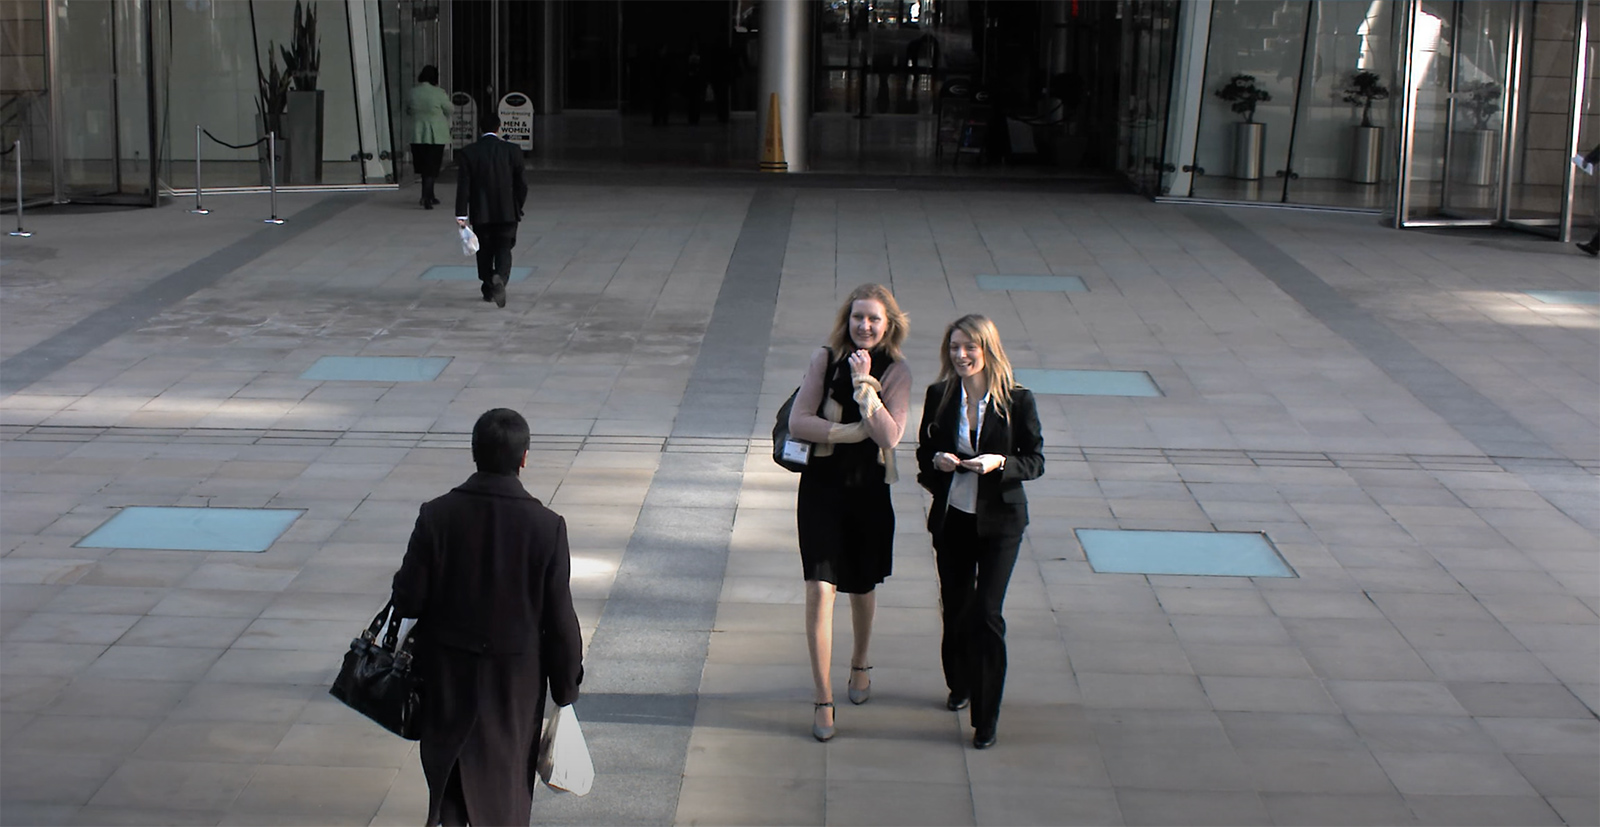

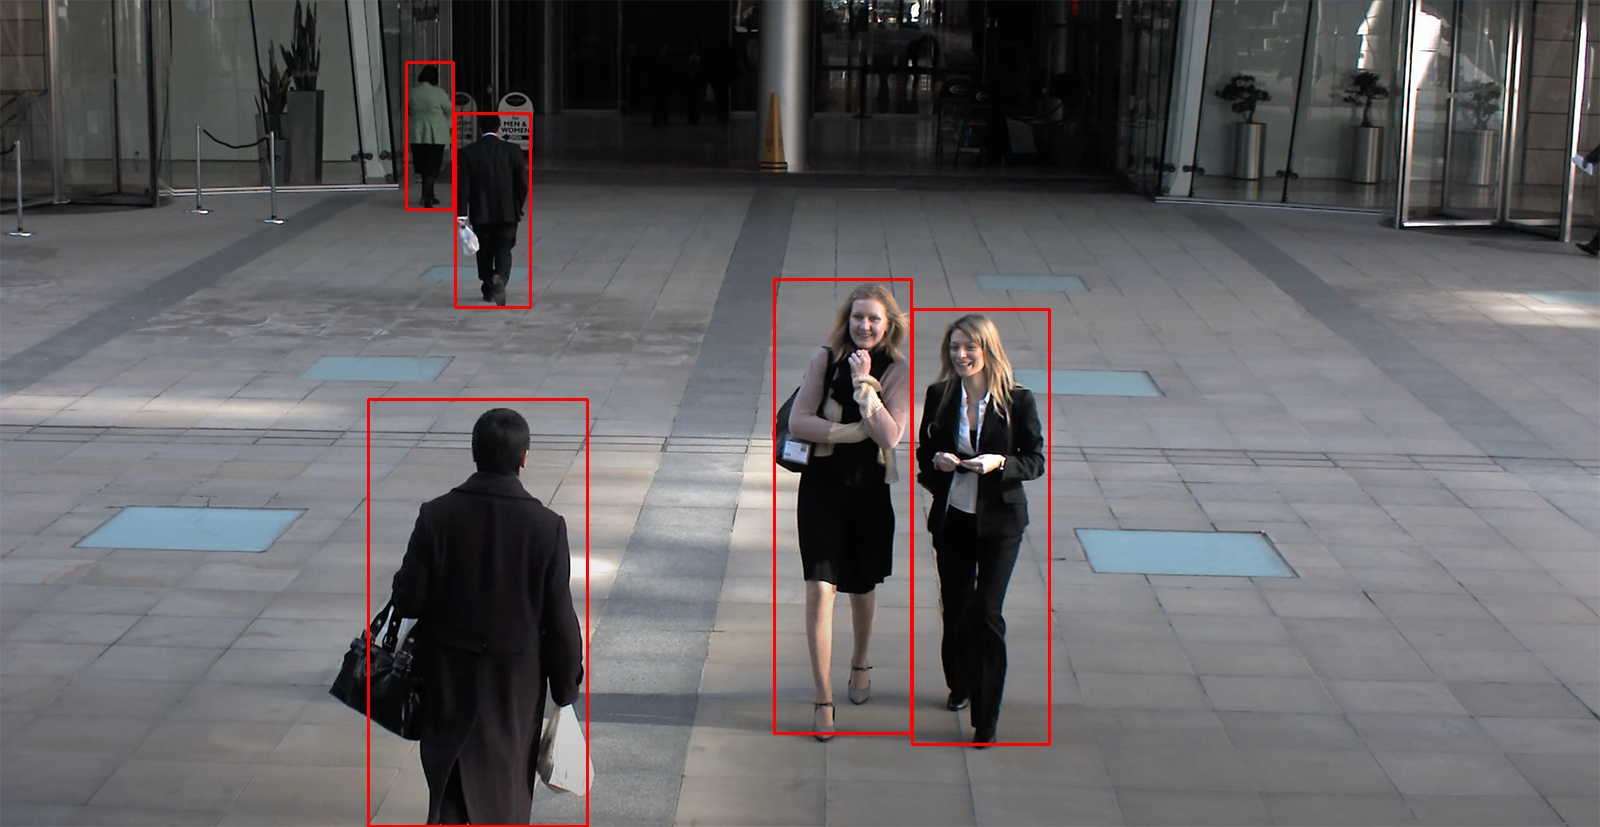

In [ ]:
header = "The total number of " + DESCRIPTION + "s " + "detected: "+str(count)
display_text(header)
display_text(FILE_NAME)
display_image(FILE_NAME)
display_text('output.jpg')
display_image('output.jpg')